#### Import libraries

In [1213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1214]:
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")


#### LOAD THE DATA

In [1215]:
df = pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\Capstone project\movie_metadata dataset.csv")
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [1216]:
df.drop(columns=["movie_imdb_link","movie_title","plot_keywords"], axis=1, inplace=True)

In [1217]:
# Target variable ---> imdb_score(regression)
# But we are converting numeric into categorical(multi-class classification) using binning method

In [1218]:
def imdb(score):
    if score <= 3:
        return 0  # Flop
    elif score <= 6:
        return 1  # Average
    else:
        return 2  # Hit

In [1219]:
df["Classify"] = df["imdb_score"].apply(imdb)

In [1220]:
df.drop(columns=["imdb_score"], axis=1, inplace=True)

In [1221]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Classify
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,1.78,33000,2
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,2.35,0,2
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,2.35,85000,2
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,2.35,164000,2
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,0,2


In [1222]:
# Check Event Rate
df["Classify"].value_counts()

Classify
2    3458
1    1539
0      46
Name: count, dtype: int64

In [1223]:
df.shape

(5043, 25)

In [1224]:
# Create 100 fake flop samples
fake_flops = df[df['Classify'] == 0].sample(100, replace=True).copy()

# Add some randomness
fake_flops['budget'] = fake_flops['budget'] * np.random.uniform(0.4, 0.8, size=len(fake_flops))
fake_flops['gross']  = fake_flops['gross']  * np.random.uniform(0.1, 0.4, size=len(fake_flops))
fake_flops['num_voted_users'] = fake_flops['num_voted_users'] * np.random.uniform(0.1, 0.5, size=len(fake_flops))

# Append to original dataset
df = pd.concat([df, fake_flops], ignore_index=True)

### Data Spliting

In [1225]:
df_train, df_test = train_test_split(df, test_size=0.15, random_state=651,stratify=df["Classify"])

In [1226]:
df_train.shape,df_test.shape

((4371, 25), (772, 25))

### Missing value Identification & Treatement

In [1227]:
df_train.isnull().sum()

color                         19
director_name                 93
num_critic_for_reviews        45
duration                      11
director_facebook_likes       93
actor_3_facebook_likes        22
actor_2_name                  13
actor_1_facebook_likes         7
gross                        792
genres                         0
actor_1_name                   7
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  22
facenumber_in_poster          12
num_user_for_reviews          19
language                      13
country                        5
content_rating               270
budget                       429
title_year                    97
actor_2_facebook_likes        13
aspect_ratio                 286
movie_facebook_likes           0
Classify                       0
dtype: int64

In [1228]:
df_test.isnull().sum()

color                          2
director_name                 13
num_critic_for_reviews         7
duration                       4
director_facebook_likes       13
actor_3_facebook_likes         3
actor_2_name                   2
actor_1_facebook_likes         0
gross                        126
genres                         0
actor_1_name                   0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   3
facenumber_in_poster           1
num_user_for_reviews           2
language                       1
country                        0
content_rating                37
budget                        66
title_year                    13
actor_2_facebook_likes         2
aspect_ratio                  54
movie_facebook_likes           0
Classify                       0
dtype: int64

In [1229]:
df_train["color"].value_counts()

color
Color               4178
 Black and White     174
Name: count, dtype: int64

In [1230]:
# In this data there is some missing values which has whitespace or empty string so here im using regular expression to convert whitespaces into NAN.
df_train.replace(r'^\s*$', np.nan, regex=True, inplace=True)
df_test.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [1231]:
# Here,after replacing with NAN we are divided 2 diffrent colums one is categorical and the other one is numeric 
# categorical ----> from training set we are selecting the datatype ----> creating the loop----> using mode imputation(frequently used values) we are filling the missing columns
# numeric ----> from training set we are selecting the datatype ----> creating the loop----> using median imputation(middle value) we are filling the missing columns

In [1232]:
cat_cols = df_train.select_dtypes(include=["object"]).columns
for col in cat_cols:
    mode_value = df_train[col].mode()[0]
    df_train[col].fillna(mode_value,inplace=True)
    df_test[col].fillna(mode_value,inplace=True)

In [1233]:
num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    median_value = df_train[col].median()
    df_train[col].fillna(median_value, inplace=True)
    df_test[col].fillna(median_value, inplace=True)

In [1234]:
df_train.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
aspect_ratio                 0
movie_facebook_likes         0
Classify                     0
dtype: int64

In [1235]:
df_test.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
aspect_ratio                 0
movie_facebook_likes         0
Classify                     0
dtype: int64

### EDA(Exploratory Data Analysis)

In [1236]:
df_train.shape

(4371, 25)

In [1237]:
df_test.shape

(772, 25)

In [1238]:
df_train.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Classify
count,4371.000000,4371.000000,4371.000000,4371.000000,4371.000000,4.371000e+03,4.371000e+03,4371.000000,4371.000000,4371.000000,4.371000e+03,4371.00000,4371.000000,4371.000000,4371.000000,4371.000000
mean,137.758636,107.055822,658.276367,642.658431,6262.192404,4.418378e+07,8.252940e+04,9332.704415,1.359643,270.375429,3.855785e+07,2002.52528,1574.308167,2.232052,7456.409975,1.644017
std,121.316205,25.500053,2765.324895,1687.429211,14541.522584,6.373733e+07,1.398611e+05,17388.637346,2.004380,374.189918,2.099309e+08,12.34806,3472.910485,1.355716,19607.512520,0.534848
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.00000,0.000000,1.180000,0.000000,0.000000
25%,49.000000,93.000000,7.000000,132.000000,607.000000,8.035389e+06,7.860500e+03,1373.000000,0.000000,64.000000,7.000000e+06,1999.00000,278.000000,1.850000,0.000000,1.000000
50%,107.000000,103.000000,48.000000,366.000000,971.000000,2.513829e+07,3.210300e+04,2986.000000,1.000000,154.000000,1.900000e+07,2005.00000,593.000000,2.350000,161.000000,2.000000
75%,190.000000,117.000000,182.500000,625.000000,11000.000000,5.071058e+07,9.281950e+04,13364.000000,2.000000,323.000000,4.000000e+07,2010.00000,906.500000,2.350000,2000.000000,2.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,4667.000000,1.221550e+10,2016.00000,27000.000000,16.000000,349000.000000,2.000000


In [1239]:
cat_cols

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'actor_3_name', 'language', 'country', 'content_rating'],
      dtype='object')

In [1240]:
num_cols

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes',
       'Classify'],
      dtype='object')

In [1241]:
df_imdb = df_train[["Classify","budget"]]
df_imdb.groupby(by = ["Classify"])["budget"].mean()

Classify
0    1.476649e+07
1    3.270347e+07
2    4.216713e+07
Name: budget, dtype: float64

In [1242]:
df_imdb = df_train[["Classify","gross"]]
df_imdb.groupby(by = ["Classify"])["gross"].mean()

Classify
0    1.270505e+07
1    3.350681e+07
2    5.026369e+07
Name: gross, dtype: float64

In [1243]:
df_imdb = df_train[["Classify","num_user_for_reviews"]]
df_imdb.groupby(by = ["Classify"])["num_user_for_reviews"].mean()

Classify
0    176.290323
1    169.525229
2    319.228309
Name: num_user_for_reviews, dtype: float64

In [1244]:
df_imdb = df_train[["Classify","num_voted_users"]]
df_imdb.groupby(by = ["Classify"])["num_voted_users"].mean()

Classify
0     10296.680290
1     32106.803517
2    108017.531133
Name: num_voted_users, dtype: float64

In [1245]:
df_train[num_cols].corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Classify
num_critic_for_reviews,1.000000,0.261828,0.197370,0.282193,0.203984,0.501769,0.630046,0.284842,-0.036661,0.628022,0.121262,0.256396,0.333194,-0.052513,0.680835,0.252154
duration,0.261828,1.000000,0.155251,0.124915,0.102347,0.236979,0.312502,0.138381,0.013746,0.323372,0.068480,-0.136294,0.156157,-0.073511,0.201144,0.217880
director_facebook_likes,0.197370,0.155251,1.000000,0.133552,0.095310,0.152362,0.308545,0.129261,-0.040219,0.235539,0.022844,-0.066162,0.144123,-0.015200,0.175368,0.110705
actor_3_facebook_likes,0.282193,0.124915,0.133552,1.000000,0.265736,0.312760,0.290060,0.505662,0.098742,0.234999,0.045623,0.093179,0.652423,-0.004650,0.289085,0.035989
actor_1_facebook_likes,0.203984,0.102347,0.095310,0.265736,1.000000,0.165432,0.206933,0.951474,0.068158,0.156259,0.024223,0.080065,0.364704,-0.018867,0.143779,0.089212
gross,0.501769,0.236979,0.152362,0.312760,0.165432,1.000000,0.642994,0.263172,-0.029974,0.573988,0.105167,0.038455,0.319264,-0.012540,0.391877,0.146149
num_voted_users,0.630046,0.312502,0.308545,0.290060,0.206933,0.642994,1.000000,0.286712,-0.028932,0.801029,0.079327,-0.000119,0.319251,-0.016376,0.539605,0.256555
cast_total_facebook_likes,0.284842,0.138381,0.129261,0.505662,0.951474,0.263172,0.286712,1.000000,0.089441,0.223041,0.038084,0.104684,0.607580,-0.017966,0.225974,0.098417
facenumber_in_poster,-0.036661,0.013746,-0.040219,0.098742,0.068158,-0.029974,-0.028932,0.089441,1.000000,-0.071503,-0.019768,0.057252,0.081861,0.014048,0.000644,-0.048539
num_user_for_reviews,0.628022,0.323372,0.235539,0.234999,0.156259,0.573988,0.801029,0.223041,-0.071503,1.000000,0.085380,-0.006345,0.257316,-0.025611,0.420886,0.177507


In [1246]:
df_train.corr(numeric_only=True)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Classify
num_critic_for_reviews,1.000000,0.261828,0.197370,0.282193,0.203984,0.501769,0.630046,0.284842,-0.036661,0.628022,0.121262,0.256396,0.333194,-0.052513,0.680835,0.252154
duration,0.261828,1.000000,0.155251,0.124915,0.102347,0.236979,0.312502,0.138381,0.013746,0.323372,0.068480,-0.136294,0.156157,-0.073511,0.201144,0.217880
director_facebook_likes,0.197370,0.155251,1.000000,0.133552,0.095310,0.152362,0.308545,0.129261,-0.040219,0.235539,0.022844,-0.066162,0.144123,-0.015200,0.175368,0.110705
actor_3_facebook_likes,0.282193,0.124915,0.133552,1.000000,0.265736,0.312760,0.290060,0.505662,0.098742,0.234999,0.045623,0.093179,0.652423,-0.004650,0.289085,0.035989
actor_1_facebook_likes,0.203984,0.102347,0.095310,0.265736,1.000000,0.165432,0.206933,0.951474,0.068158,0.156259,0.024223,0.080065,0.364704,-0.018867,0.143779,0.089212
gross,0.501769,0.236979,0.152362,0.312760,0.165432,1.000000,0.642994,0.263172,-0.029974,0.573988,0.105167,0.038455,0.319264,-0.012540,0.391877,0.146149
num_voted_users,0.630046,0.312502,0.308545,0.290060,0.206933,0.642994,1.000000,0.286712,-0.028932,0.801029,0.079327,-0.000119,0.319251,-0.016376,0.539605,0.256555
cast_total_facebook_likes,0.284842,0.138381,0.129261,0.505662,0.951474,0.263172,0.286712,1.000000,0.089441,0.223041,0.038084,0.104684,0.607580,-0.017966,0.225974,0.098417
facenumber_in_poster,-0.036661,0.013746,-0.040219,0.098742,0.068158,-0.029974,-0.028932,0.089441,1.000000,-0.071503,-0.019768,0.057252,0.081861,0.014048,0.000644,-0.048539
num_user_for_reviews,0.628022,0.323372,0.235539,0.234999,0.156259,0.573988,0.801029,0.223041,-0.071503,1.000000,0.085380,-0.006345,0.257316,-0.025611,0.420886,0.177507


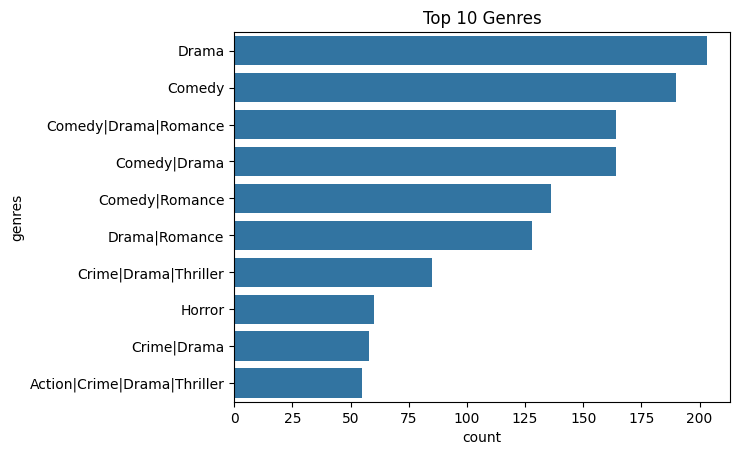

In [1247]:
sns.countplot(
    y="genres",
    data=df_train,
    order=df_train["genres"].value_counts().head(10).index
)
plt.title("Top 10 Genres")
plt.show()

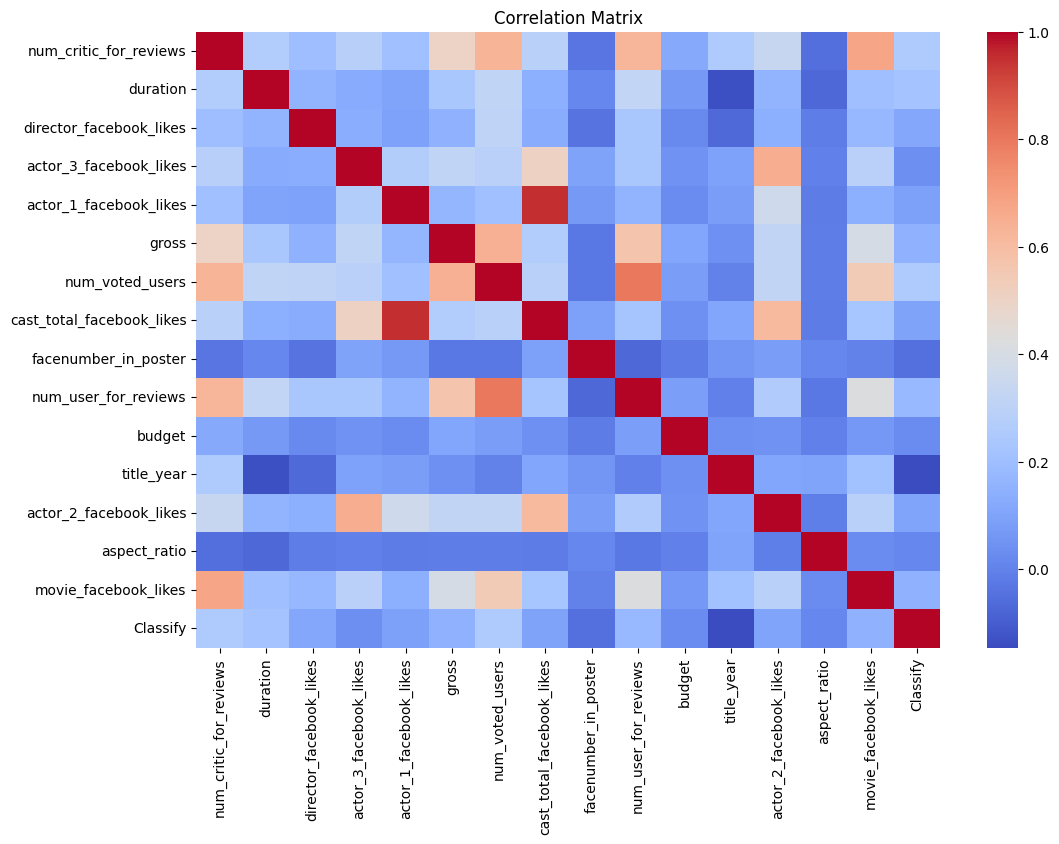

In [1248]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train[num_cols].corr(), cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

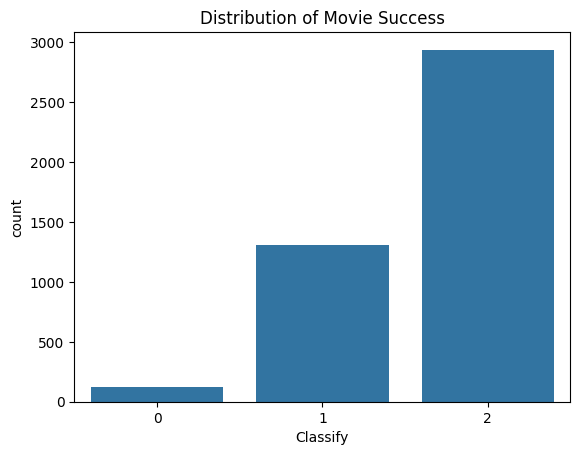

In [1249]:
sns.countplot(x='Classify', data=df_train)
plt.title('Distribution of Movie Success')
plt.show()

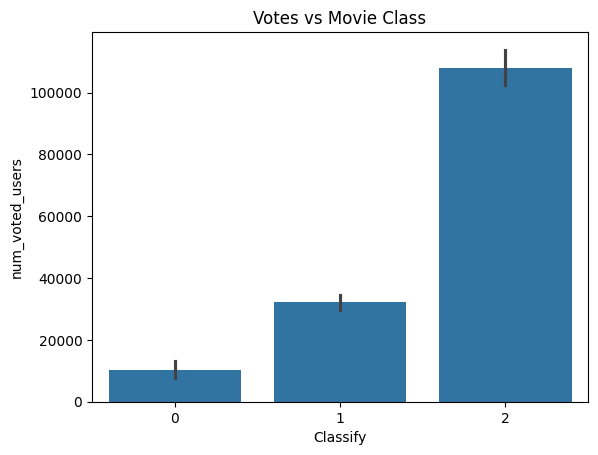

In [1250]:
sns.barplot(x="Classify", y="num_voted_users", data=df_train, estimator=np.mean)
plt.title("Votes vs Movie Class")
plt.show()

In [1251]:
features = [
    'num_critic_for_reviews', 'duration',
    'director_facebook_likes',
    'actor_3_facebook_likes', 'actor_1_facebook_likes',
    'facenumber_in_poster',
    'num_user_for_reviews', 'title_year',
    'actor_2_facebook_likes', 'aspect_ratio',
    'movie_facebook_likes',
    'gross', 'budget', 'num_voted_users',
    'language', 'country'
]

df_train = df_train[features + ['Classify']].dropna()
df_test  = df_test[features + ['Classify']].dropna()

#### Outlier Detection & Treatment

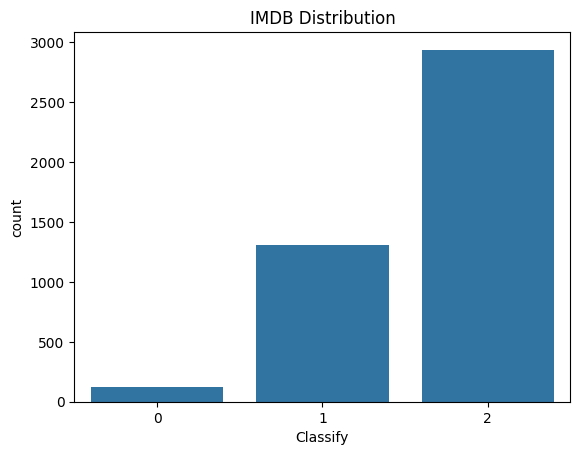

In [1252]:
sns.countplot(x="Classify", data=df_train)
plt.title("IMDB Distribution")
plt.show()

In [1253]:
df_train["Classify"].value_counts(normalize=True)

Classify
2    0.672386
1    0.299245
0    0.028369
Name: proportion, dtype: float64

<Axes: xlabel='budget', ylabel='Count'>

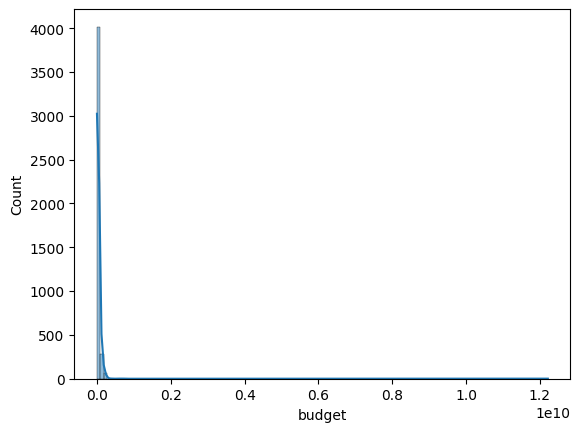

In [1254]:
sns.histplot(df_train, x="budget", kde=True)

<Axes: xlabel='num_voted_users', ylabel='Count'>

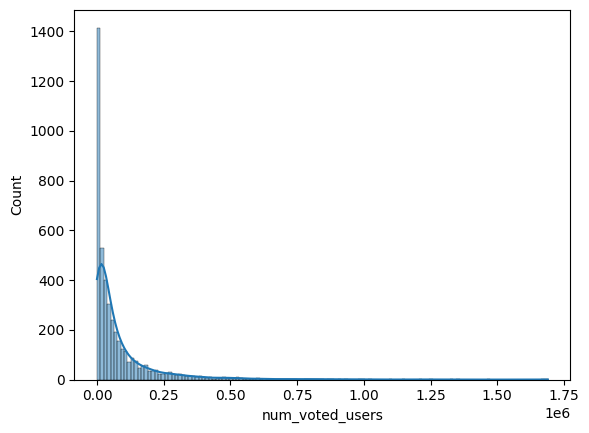

In [1255]:
sns.histplot(df_train,x="num_voted_users",kde=True)

<Axes: xlabel='gross', ylabel='Count'>

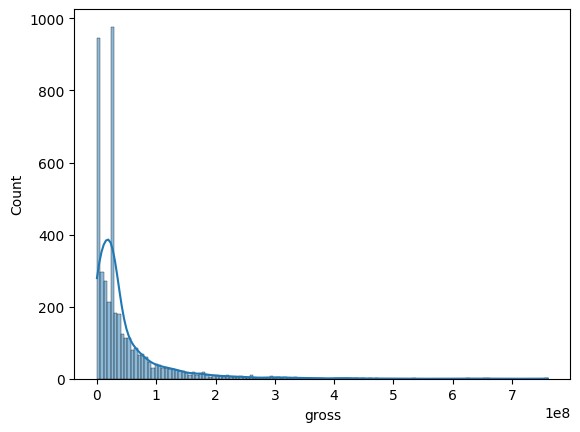

In [1256]:
sns.histplot(df_train, x="gross",kde=True)

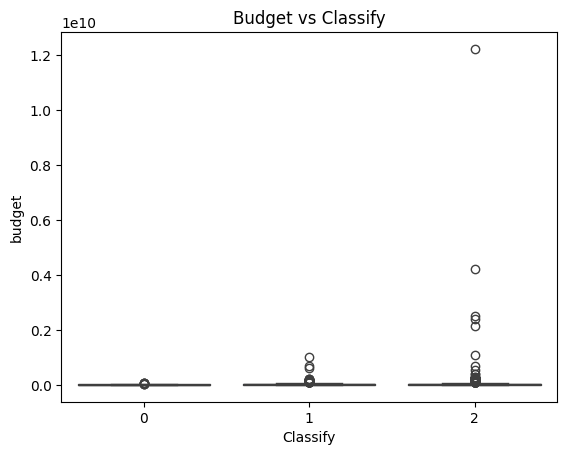

In [1257]:
sns.boxplot(x="Classify", y="budget", data=df_train)
plt.title("Budget vs Classify")
plt.show()

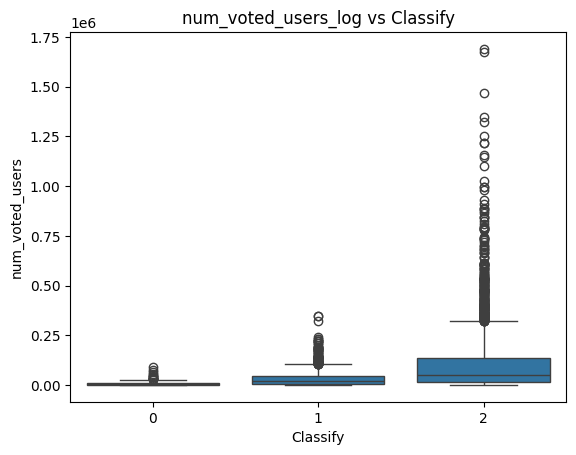

In [1258]:
sns.boxplot(x="Classify", y="num_voted_users", data=df_train)
plt.title("num_voted_users_log vs Classify")
plt.show()

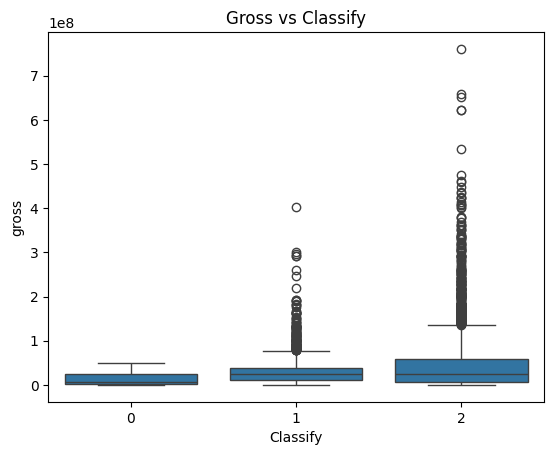

In [1259]:
sns.boxplot(x="Classify", y="gross", data=df_train)
plt.title("Gross vs Classify")
plt.show()

In [1260]:
# Here, Budget,gross,num of voted users have outiler so we are treating it using Logtransform which it will keep the real data and reduces the skewness

In [1261]:
df_train["gross_log"] = np.log1p(df_train["gross"])

In [1262]:
df_train["budget_log"] = np.log1p(df_train["budget"])

In [1263]:
df_train["num_voted_users_log"] = np.log1p(df_train["num_voted_users"])

In [1264]:
# we have done logtransform previous so we are reversing the log1p transformation to get raw values for the calculation to get exact for flops
df_train["profit"] = (df_train["gross"] - df_train["budget"]) / (df_train["budget"] + 1e-6)

In [1265]:
df_train["total_cast_likes"] = (
    df_train["actor_1_facebook_likes"] +
    df_train["actor_2_facebook_likes"] +
    df_train["actor_3_facebook_likes"]
)

In [1266]:
df_train["review_ratio"] = (df_train["num_user_for_reviews"] /(df_train["num_critic_for_reviews"] + 1e-6))

In [1267]:
df_test["gross_log"] = np.log1p(df_test["gross"])

In [1268]:
df_test["budget_log"] = np.log1p(df_test["budget"])

In [1269]:
df_test["num_voted_users_log"] = np.log1p(df_test["num_voted_users"])

In [1270]:
df_test["profit"] = (df_test["gross"] - df_test["budget"]) / (df_test["budget"] + 1e-6)

In [1271]:
df_test["total_cast_likes"] = (
    df_test["actor_1_facebook_likes"] +
    df_test["actor_2_facebook_likes"] +
    df_test["actor_3_facebook_likes"]
)

In [1272]:
df_test["review_ratio"] = (df_test["num_user_for_reviews"] /(df_test["num_critic_for_reviews"] + 1e-6))

In [1273]:
df_train.drop(columns=["gross","budget","num_voted_users"], axis=1, inplace=True)
df_test.drop(columns=["gross","budget","num_voted_users"], axis=1, inplace=True)

<Axes: xlabel='gross_log', ylabel='Count'>

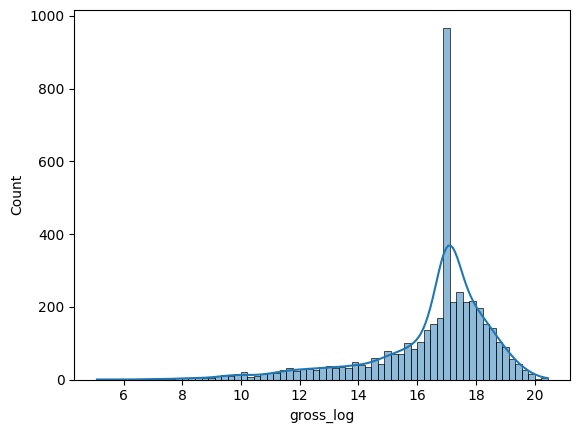

In [1274]:
sns.histplot(df_train, x="gross_log",kde=True)

<Axes: xlabel='num_voted_users_log', ylabel='Count'>

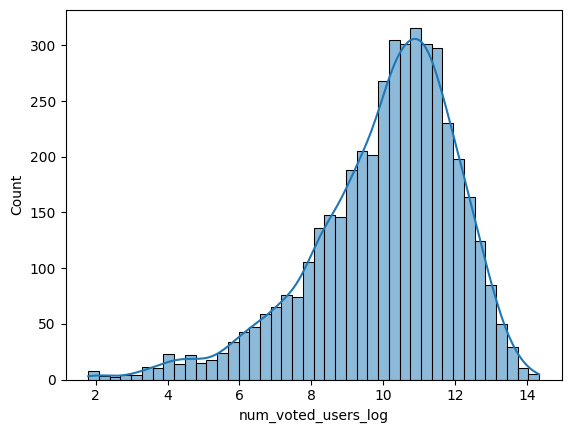

In [1275]:
sns.histplot(df_train,x="num_voted_users_log",kde=True)

<Axes: xlabel='budget_log', ylabel='Count'>

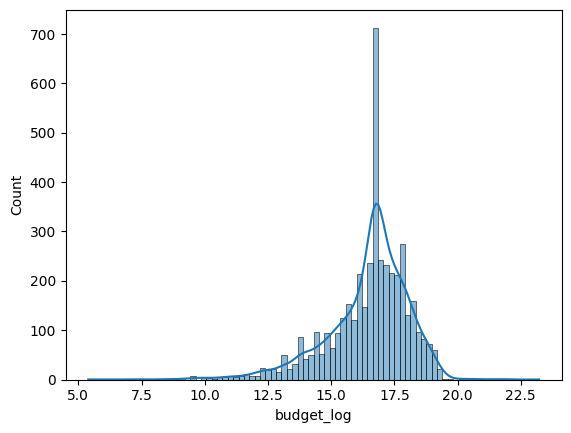

In [1276]:
sns.histplot(df_train,x="budget_log",kde=True)

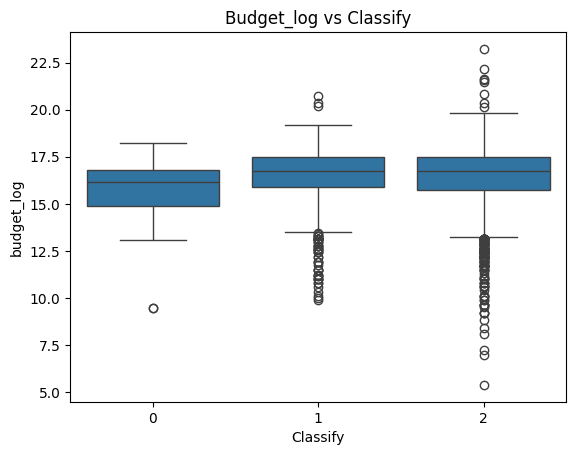

In [1277]:
sns.boxplot(x="Classify", y="budget_log", data=df_train)
plt.title("Budget_log vs Classify")
plt.show()

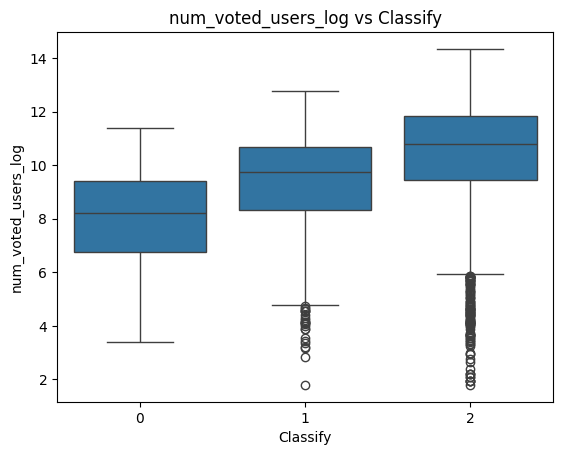

In [1278]:
sns.boxplot(x="Classify", y="num_voted_users_log", data=df_train)
plt.title("num_voted_users_log vs Classify")
plt.show()

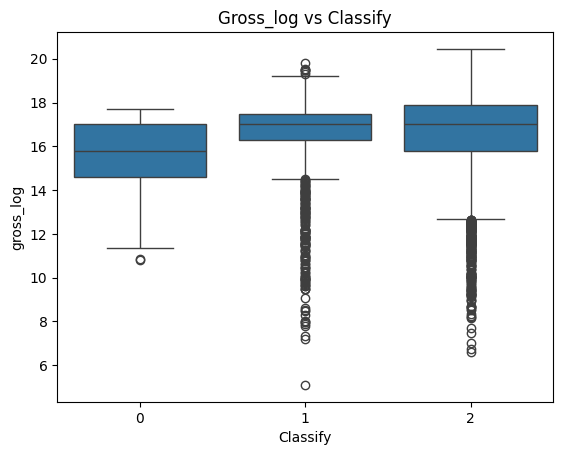

In [1279]:
sns.boxplot(x="Classify", y="gross_log", data=df_train)
plt.title("Gross_log vs Classify")
plt.show()

### Significance test

In [1280]:
cat_cols

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'actor_3_name', 'language', 'country', 'content_rating'],
      dtype='object')

In [1281]:
cat_cols = df_train.select_dtypes(include=["object", "category"]).columns.tolist()

In [1282]:
for col in cat_cols:
    contingency = pd.crosstab(df_train[col], df_train["Classify"])
    p_value = stats.chi2_contingency(contingency)[1]
    print(f"p-value for {col}: {p_value}")

p-value for language: 0.759012433198225
p-value for country: 0.002600623053120426


In [1283]:
# language is not significant

In [1284]:
num_cols

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes',
       'Classify'],
      dtype='object')

In [1285]:
sig_cols = num_cols.copy()

In [1286]:
sig_cols = list(sig_cols)

sig_cols.append("country")
sig_cols.append("Classify")

In [1287]:
sig_cols = [
    'num_critic_for_reviews', 'duration', 'director_facebook_likes',
    'actor_3_facebook_likes', 'actor_1_facebook_likes',
    'facenumber_in_poster', 'num_user_for_reviews', 'title_year',
    'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes','gross_log', 'budget_log', 'num_voted_users_log',
    'profit', 'total_cast_likes', 'review_ratio','country','Classify'
]


In [1288]:
df_train = df_train[sig_cols]

In [1289]:
df_test = df_test[sig_cols]

In [1290]:
df_train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,gross_log,budget_log,num_voted_users_log,profit,total_cast_likes,review_ratio,country,Classify
3029,410.0,116.0,737.0,141.0,23000.0,2.0,389.0,2010.0,238.0,2.35,36000,18.354240,17.034386,12.527685,2.742872,23379.0,0.948780,USA,2
3369,135.0,90.0,5.0,297.0,449.0,1.0,148.0,2008.0,332.0,1.85,0,17.070778,15.894952,10.189042,2.240818,1078.0,1.096296,USA,1
3474,160.0,112.0,20.0,61.0,16000.0,5.0,168.0,2008.0,109.0,2.35,0,17.280429,16.759950,11.757917,0.682834,16170.0,1.050000,Germany,2
469,80.0,135.0,503.0,67.0,8000.0,1.0,162.0,1997.0,137.0,2.35,0,18.147316,18.132999,11.239804,0.014420,8204.0,2.025000,USA,2
2613,1.0,141.0,335.0,635.0,11000.0,2.0,1.0,2016.0,744.0,2.35,0,17.039903,18.420681,4.143135,-0.748617,12379.0,0.999999,USA,2


### Data Transformation


In [1291]:
df_train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,gross_log,budget_log,num_voted_users_log,profit,total_cast_likes,review_ratio,country,Classify
3029,410.0,116.0,737.0,141.0,23000.0,2.0,389.0,2010.0,238.0,2.35,36000,18.354240,17.034386,12.527685,2.742872,23379.0,0.948780,USA,2
3369,135.0,90.0,5.0,297.0,449.0,1.0,148.0,2008.0,332.0,1.85,0,17.070778,15.894952,10.189042,2.240818,1078.0,1.096296,USA,1
3474,160.0,112.0,20.0,61.0,16000.0,5.0,168.0,2008.0,109.0,2.35,0,17.280429,16.759950,11.757917,0.682834,16170.0,1.050000,Germany,2
469,80.0,135.0,503.0,67.0,8000.0,1.0,162.0,1997.0,137.0,2.35,0,18.147316,18.132999,11.239804,0.014420,8204.0,2.025000,USA,2
2613,1.0,141.0,335.0,635.0,11000.0,2.0,1.0,2016.0,744.0,2.35,0,17.039903,18.420681,4.143135,-0.748617,12379.0,0.999999,USA,2


In [1292]:
df_train.dtypes

num_critic_for_reviews     float64
duration                   float64
director_facebook_likes    float64
actor_3_facebook_likes     float64
actor_1_facebook_likes     float64
facenumber_in_poster       float64
num_user_for_reviews       float64
title_year                 float64
actor_2_facebook_likes     float64
aspect_ratio               float64
movie_facebook_likes         int64
gross_log                  float64
budget_log                 float64
num_voted_users_log        float64
profit                     float64
total_cast_likes           float64
review_ratio               float64
country                     object
Classify                     int64
dtype: object

In [1293]:
df_train["Classify"].isnull().sum()

np.int64(0)

In [1294]:
df_train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,gross_log,budget_log,num_voted_users_log,profit,total_cast_likes,review_ratio,country,Classify
3029,410.0,116.0,737.0,141.0,23000.0,2.0,389.0,2010.0,238.0,2.35,36000,18.354240,17.034386,12.527685,2.742872,23379.0,0.948780,USA,2
3369,135.0,90.0,5.0,297.0,449.0,1.0,148.0,2008.0,332.0,1.85,0,17.070778,15.894952,10.189042,2.240818,1078.0,1.096296,USA,1
3474,160.0,112.0,20.0,61.0,16000.0,5.0,168.0,2008.0,109.0,2.35,0,17.280429,16.759950,11.757917,0.682834,16170.0,1.050000,Germany,2
469,80.0,135.0,503.0,67.0,8000.0,1.0,162.0,1997.0,137.0,2.35,0,18.147316,18.132999,11.239804,0.014420,8204.0,2.025000,USA,2
2613,1.0,141.0,335.0,635.0,11000.0,2.0,1.0,2016.0,744.0,2.35,0,17.039903,18.420681,4.143135,-0.748617,12379.0,0.999999,USA,2


In [1295]:
df_train["country"].value_counts()

country
USA                   3308
UK                     376
France                 138
Canada                 100
Germany                 90
                      ... 
Nigeria                  1
Turkey                   1
Dominican Republic       1
Bahamas                  1
Cameroon                 1
Name: count, Length: 62, dtype: int64

In [1296]:
#One-hot encoding(n-1) ---> Country
df_train = pd.get_dummies(df_train, columns=["country"], drop_first=True, dtype=int)
df_test  = pd.get_dummies(df_test, columns=["country"], drop_first=True, dtype=int)

In [1297]:
# Align train and test columns
df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

In [1298]:
df_train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,...,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_UK,country_USA,country_United Arab Emirates,country_West Germany
3029,410.0,116.0,737.0,141.0,23000.0,2.0,389.0,2010.0,238.0,2.35,...,0,0,0,0,0,0,0,1,0,0
3369,135.0,90.0,5.0,297.0,449.0,1.0,148.0,2008.0,332.0,1.85,...,0,0,0,0,0,0,0,1,0,0
3474,160.0,112.0,20.0,61.0,16000.0,5.0,168.0,2008.0,109.0,2.35,...,0,0,0,0,0,0,0,0,0,0
469,80.0,135.0,503.0,67.0,8000.0,1.0,162.0,1997.0,137.0,2.35,...,0,0,0,0,0,0,0,1,0,0
2613,1.0,141.0,335.0,635.0,11000.0,2.0,1.0,2016.0,744.0,2.35,...,0,0,0,0,0,0,0,1,0,0


In [1299]:
df_train.value_counts()

num_critic_for_reviews  duration  director_facebook_likes  actor_3_facebook_likes  actor_1_facebook_likes  facenumber_in_poster  num_user_for_reviews  title_year  actor_2_facebook_likes  aspect_ratio  movie_facebook_likes  gross_log  budget_log  num_voted_users_log  profit      total_cast_likes  review_ratio  Classify  country_Aruba  country_Australia  country_Bahamas  country_Belgium  country_Brazil  country_Bulgaria  country_Cambodia  country_Cameroon  country_Canada  country_Chile  country_China  country_Colombia  country_Czech Republic  country_Denmark  country_Dominican Republic  country_Egypt  country_Finland  country_France  country_Georgia  country_Germany  country_Greece  country_Hong Kong  country_Hungary  country_Iceland  country_India  country_Indonesia  country_Iran  country_Ireland  country_Israel  country_Italy  country_Japan  country_Kenya  country_Kyrgyzstan  country_Libya  country_Mexico  country_Netherlands  country_New Line  country_New Zealand  country_Nigeria  cou

In [1300]:
num_to_scale = [
    'num_critic_for_reviews', 'duration', 'director_facebook_likes',
    'actor_3_facebook_likes', 'actor_1_facebook_likes',
    'facenumber_in_poster', 'num_user_for_reviews', 'title_year',
    'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes',
    'gross_log', 'budget_log', 'num_voted_users_log',
    'profit', 'total_cast_likes', 'review_ratio'
]

scaler = StandardScaler()
df_train[num_to_scale] = scaler.fit_transform(df_train[num_to_scale])
df_test[num_to_scale] = scaler.transform(df_test[num_to_scale])

In [1301]:
df_train[num_to_scale].describe().round(2)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,gross_log,budget_log,num_voted_users_log,profit,total_cast_likes,review_ratio
count,4371.00,4371.00,4371.00,4371.00,4371.00,4371.00,4371.00,4371.00,4371.00,4371.00,4371.00,4371.00,4371.00,4371.00,4371.00,4371.00,4371.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.13,-3.92,-0.24,-0.38,-0.43,-0.68,-0.72,-7.01,-0.45,-0.78,-0.38,-5.40,-6.78,-4.09,-0.06,-0.50,-1.00
25%,-0.73,-0.55,-0.24,-0.30,-0.39,-0.68,-0.55,-0.29,-0.37,-0.28,-0.38,-0.28,-0.43,-0.53,-0.06,-0.44,-0.56
50%,-0.25,-0.16,-0.22,-0.16,-0.36,-0.18,-0.31,0.20,-0.28,0.09,-0.37,0.26,0.18,0.17,-0.05,-0.38,-0.23
75%,0.43,0.39,-0.17,-0.01,0.33,0.32,0.14,0.61,-0.19,0.09,-0.28,0.59,0.64,0.69,-0.05,0.24,0.27
max,5.57,15.84,8.08,13.25,43.59,20.78,11.75,1.09,7.32,10.16,17.42,1.88,4.14,2.13,54.42,38.38,24.75


In [1302]:
df_train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,aspect_ratio,...,country_Spain,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_UK,country_USA,country_United Arab Emirates,country_West Germany
3029,2.244321,0.350791,0.028471,-0.297326,1.151167,0.319515,0.317053,0.605405,-0.384825,0.087010,...,0,0,0,0,0,0,0,1,0,0
3369,-0.022742,-0.668931,-0.236266,-0.204867,-0.399811,-0.179449,-0.327078,0.443418,-0.357755,-0.281841,...,0,0,0,0,0,0,0,1,0,0
3474,0.183355,0.193911,-0.230841,-0.344740,0.669732,1.816409,-0.273623,0.443418,-0.421973,0.087010,...,0,0,0,0,0,0,0,0,0,0
469,-0.476154,1.095973,-0.056158,-0.341184,0.119520,-0.179449,-0.289660,-0.447513,-0.413910,0.087010,...,0,0,0,0,0,0,0,1,0,0
2613,-1.127420,1.331294,-0.116917,-0.004539,0.325850,0.319515,-0.719972,1.091367,-0.239109,0.087010,...,0,0,0,0,0,0,0,1,0,0


### Model Training

In [1303]:
df_train.columns.to_list()

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'title_year',
 'actor_2_facebook_likes',
 'aspect_ratio',
 'movie_facebook_likes',
 'gross_log',
 'budget_log',
 'num_voted_users_log',
 'profit',
 'total_cast_likes',
 'review_ratio',
 'Classify',
 'country_Aruba',
 'country_Australia',
 'country_Bahamas',
 'country_Belgium',
 'country_Brazil',
 'country_Bulgaria',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Czech Republic',
 'country_Denmark',
 'country_Dominican Republic',
 'country_Egypt',
 'country_Finland',
 'country_France',
 'country_Georgia',
 'country_Germany',
 'country_Greece',
 'country_Hong Kong',
 'country_Hungary',
 'country_Iceland',
 'country_India',
 'country_Indonesia',
 'country_Iran',
 'country_Ireland',
 'country_Israel',
 'country_Italy',
 'country_Japan',
 'c

In [1304]:
X_train = df_train.drop(columns=['Classify']).values
y_train = df_train['Classify'].values

In [1305]:
X_test = df_test.drop(columns=['Classify']).values
y_test = df_test['Classify'].values

### Baseline Models

### Logistic Regression

In [1306]:
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [1307]:
# Make prediction
y_pred=model.predict(X = X_test)

In [1308]:
y_pred_probability = model.predict_proba(X_test)

In [1309]:
y_pred

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,

In [1310]:
y_pred_probability[:,1].shape

(772,)

In [1311]:
df_train.shape

(4371, 79)

In [1312]:
df_test.shape

(772, 79)

In [1313]:
df_test["probability"] = list(y_pred_probability[:,1])

In [1314]:
# F1-score
F1_score = f1_score(y_test,y_pred,average='weighted')
print(f"F1_score:{F1_score:.2f}")


F1_score:0.67


In [1315]:
# Precision
Precision = precision_score(y_test,y_pred,average='weighted')
print(f"Precision:{Precision:.2f}")

Precision:0.68


In [1316]:
# Recall
Recall = recall_score(y_test,y_pred,average='weighted')
print(f"Recall:{Recall:.2f}")

Recall:0.70


In [1317]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[  1  12   9]
 [  1  79 151]
 [  0  55 464]]


In [1318]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.05      0.08        22
           1       0.54      0.34      0.42       231
           2       0.74      0.89      0.81       519

    accuracy                           0.70       772
   macro avg       0.59      0.43      0.44       772
weighted avg       0.68      0.70      0.67       772



In [1319]:
# Here,in logistic regression the perform well for hit,moderate for average and fails to predict for flop due to imbalance dataset,the accuracy of this is 72% but the macro avg is very poor

In [1320]:
#we convert labels into binary format and calculate a one vs rest(ovr) ROC curve and AUC score for each class

Class 0 ROC-AUC: 0.9143636363636364
Class 1 ROC-AUC: 0.7681462099207017
Class 2 ROC-AUC: 0.7927604773545965


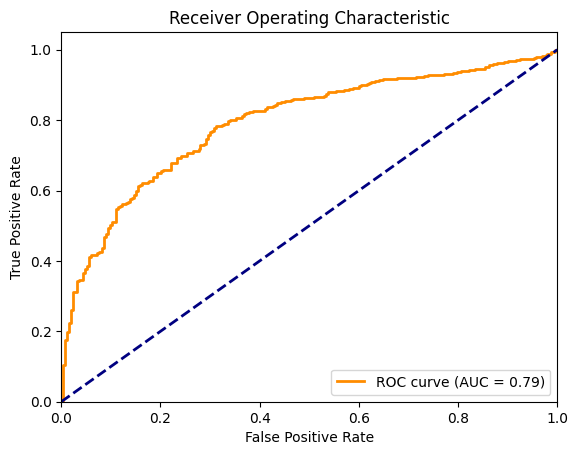

In [1321]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,y_pred_prob,multi_class='ovr',average='weighted')
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"Class {i} ROC-AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Decision Tree

In [1322]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [1323]:
# Make prediction
y_pred=model.predict(X = X_test)

In [1324]:
y_pred_probability = model.predict_proba(X_test)

In [1325]:
y_pred

array([1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0,
       2, 0, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,

In [1326]:
y_pred_probability[:,1].shape

(772,)

In [1327]:
df_test.shape

(772, 80)

In [1328]:
df_test["probability"] = list(y_pred_probability[:,1])

In [1329]:
# F1-score
F1_score = f1_score(y_test,y_pred,average='weighted')
print(f"F1_score:{F1_score:.2f}")

F1_score:0.73


In [1330]:
# Precision
Precision = precision_score(y_test,y_pred,average='weighted')
print(f"Precision:{Precision:.2f}")

Precision:0.73


In [1331]:
# Recall
Recall = recall_score(y_test,y_pred,average='weighted')
print(f"Recall:{Recall:.2f}")

Recall:0.73


In [1332]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[ 15   4   3]
 [  6 127  98]
 [  5  89 425]]


In [1333]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.68      0.62        22
           1       0.58      0.55      0.56       231
           2       0.81      0.82      0.81       519

    accuracy                           0.73       772
   macro avg       0.65      0.68      0.67       772
weighted avg       0.73      0.73      0.73       772



In [1334]:
# Here,in logistic regression the perform well for hit,moderate for average and moderate for flop due to imbalance dataset,the accuracy of this is 72% but the macro avg is very poor


In [1335]:
#we convert labels into binary format and calculate a one vs rest(ovr) ROC curve and AUC score for each class


Class 0 ROC-AUC: 0.8335757575757574
Class 1 ROC-AUC: 0.6889398340414977
Class 2 ROC-AUC: 0.7098364900576511


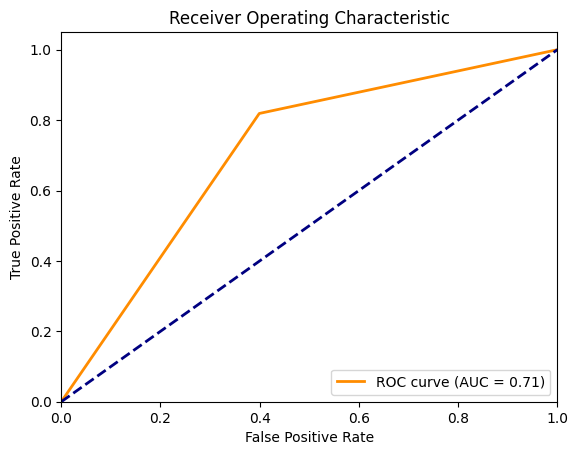

In [1336]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,y_pred_prob,multi_class='ovr',average='weighted')
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"Class {i} ROC-AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Random forest

In [1337]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [1338]:
# Make prediction
y_pred=model.predict(X = X_test)

In [1339]:
y_pred_probability = model.predict_proba(X_test)

In [1340]:
y_pred

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,

In [1341]:
y_pred_probability[:,1].shape

(772,)

In [1342]:
df_test.shape

(772, 80)

In [1343]:
df_test["probability"] = list(y_pred_probability[:,1])

In [1344]:
# F1-score
F1_score = f1_score(y_test,y_pred,average='weighted')
print(f"F1_score:{F1_score:.2f}")

F1_score:0.80


In [1345]:
# Precision
Precision = precision_score(y_test,y_pred,average='weighted')
print(f"Precision:{Precision:.2f}")

Precision:0.81


In [1346]:
# Recall
Recall = recall_score(y_test,y_pred,average='weighted')
print(f"Recall:{Recall:.2f}")

Recall:0.81


In [1347]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[ 18   1   3]
 [  0 122 109]
 [  0  32 487]]


In [1348]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.79      0.53      0.63       231
           2       0.81      0.94      0.87       519

    accuracy                           0.81       772
   macro avg       0.87      0.76      0.80       772
weighted avg       0.81      0.81      0.80       772



Class 0 ROC-AUC: 0.9664848484848484
Class 1 ROC-AUC: 0.8651007033631803
Class 2 ROC-AUC: 0.8748086545271767


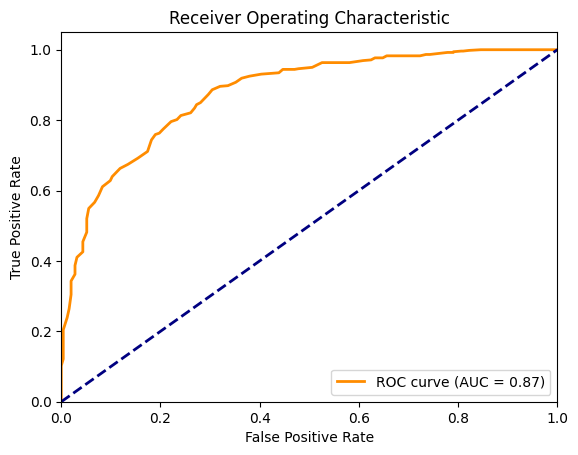

In [1349]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,y_pred_prob,multi_class='ovr',average='weighted')
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"Class {i} ROC-AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Gradient Boosting

In [1350]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, 

In [1351]:
# Make prediction
y_pred=model.predict(X = X_test)

In [1352]:
y_pred_probability = model.predict_proba(X_test)

In [1353]:
y_pred

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1,

In [1354]:
y_pred_probability[:,1].shape

(772,)

In [1355]:
df_test.shape

(772, 80)

In [1356]:
df_test["probability"] = list(y_pred_probability[:,1])

In [1357]:
# F1-score
F1_score = f1_score(y_test,y_pred,average='weighted')
print(f"F1_score:{F1_score:.2f}")

F1_score:0.80


In [1358]:
# Precision
Precision = precision_score(y_test,y_pred,average='weighted')
print(f"Precision:{Precision:.2f}")

Precision:0.81


In [1359]:
# Recall
Recall = recall_score(y_test,y_pred,average='weighted')
print(f"Recall:{Recall:.2f}")

Recall:0.81


In [1360]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[ 13   3   6]
 [  0 136  95]
 [  0  44 475]]


In [1361]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.59      0.74        22
           1       0.74      0.59      0.66       231
           2       0.82      0.92      0.87       519

    accuracy                           0.81       772
   macro avg       0.86      0.70      0.76       772
weighted avg       0.81      0.81      0.80       772



Class 0 ROC-AUC: 0.948
Class 1 ROC-AUC: 0.8702098886941769
Class 2 ROC-AUC: 0.8782243140122004


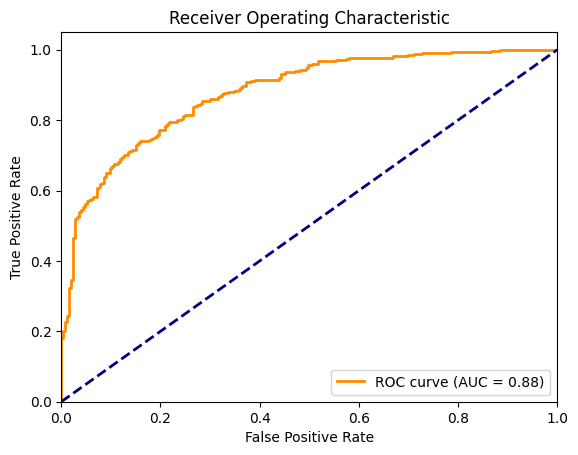

In [1362]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,y_pred_prob,multi_class='ovr',average='weighted')
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"Class {i} ROC-AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### XGboost

In [1363]:
model = XGBClassifier().fit(X_train, y_train)

In [1364]:
# Make prediction
y_pred=model.predict(X = X_test)

In [1365]:
# Make prediction
y_pred=model.predict(X = X_test)

In [1366]:
y_pred_probability = model.predict_proba(X_test)

In [1367]:
y_pred

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,

In [1368]:
y_pred_probability[:,1].shape

(772,)

In [1369]:
df_test.shape

(772, 80)

In [1370]:
df_test["probability"] = list(y_pred_probability[:,1])

In [1371]:
# F1-score
F1_score = f1_score(y_test,y_pred,average='weighted')
print(f"F1_score:{F1_score:.2f}")

F1_score:0.81


In [1372]:
# Precision
Precision = precision_score(y_test,y_pred,average='weighted')
print(f"Precision:{Precision:.2f}")

Precision:0.81


In [1373]:
# Recall
Recall = recall_score(y_test,y_pred,average='weighted')
print(f"Recall:{Recall:.2f}")

Recall:0.81


In [1374]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[ 17   4   1]
 [  0 144  87]
 [  1  50 468]]


In [1375]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85        22
           1       0.73      0.62      0.67       231
           2       0.84      0.90      0.87       519

    accuracy                           0.81       772
   macro avg       0.84      0.77      0.80       772
weighted avg       0.81      0.81      0.81       772



Class 0 ROC-AUC: 0.9739393939393939
Class 1 ROC-AUC: 0.8720423138168055
Class 2 ROC-AUC: 0.8823825081678813


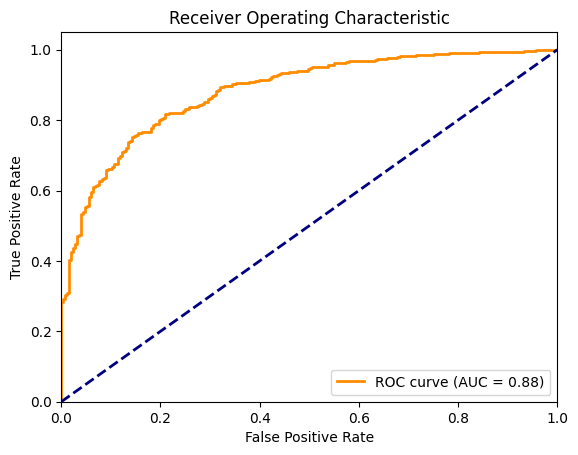

In [1376]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,y_pred_prob,multi_class='ovr',average='weighted')
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"Class {i} ROC-AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [1377]:
y_pred_probability = model.predict_proba(X_test)

In [1378]:
y_pred

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,

In [1379]:
y_pred_probability[:,1].shape

(772,)

In [1380]:
df_test.shape

(772, 80)

In [1381]:
df_test["probability"] = list(y_pred_probability[:,1])

In [1382]:
# F1-score
F1_score = f1_score(y_test,y_pred,average='weighted')
print(f"F1_score:{F1_score:.2f}")

F1_score:0.81


In [1383]:
# Precision
Precision = precision_score(y_test,y_pred,average='weighted')
print(f"Precision:{Precision:.2f}")

Precision:0.81


In [1384]:
# Recall
Recall = recall_score(y_test,y_pred,average='weighted')
print(f"Recall:{Recall:.2f}")

Recall:0.81


In [1385]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[ 17   4   1]
 [  0 144  87]
 [  1  50 468]]


In [1386]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85        22
           1       0.73      0.62      0.67       231
           2       0.84      0.90      0.87       519

    accuracy                           0.81       772
   macro avg       0.84      0.77      0.80       772
weighted avg       0.81      0.81      0.81       772



Class 0 ROC-AUC: 0.9739393939393939
Class 1 ROC-AUC: 0.8720423138168055
Class 2 ROC-AUC: 0.8823825081678813


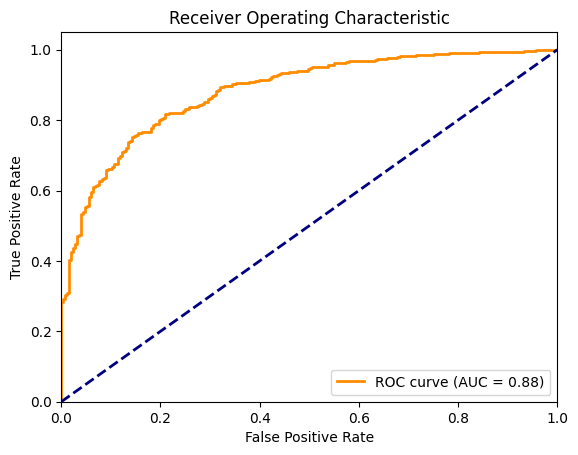

In [1387]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,y_pred_prob,multi_class='ovr',average='weighted')
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"Class {i} ROC-AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [1388]:
# Result:-  
# LR is rejected for failing to identify the Flop category and it as low ROC and AUC score.
# RF,XGB and GB deliver the highest overall accuracy and it works as backup
# DT is selected as the final model because it maintains the most stable and balanced performance across Hit, Average, and Flop movies.

#### Shortlisting the model

#### K-fold cross Validation

In [1389]:
X_train.shape

(4371, 78)

In [1390]:
X_test.shape

(772, 78)

In [1391]:
X = np.vstack((X_train,X_test))

In [1392]:
y = np.append(y_train,y_test)

In [1393]:
model = DecisionTreeClassifier()

In [1394]:
k = 5

In [1395]:
cv_scores = cross_val_score(model, X, y, cv=k)

In [1396]:
cv_scores

array([0.68804665, 0.72303207, 0.73080661, 0.71789883, 0.73638132])

#### Hyper Parameter Tuning (Grid Search)

In [1397]:
# criterion, max_depth, min_samples_leaf parameters to be tested in grid-search 

In [1398]:
param_grid = {
    "criterion" : ["gini", "entropy"], 
    "max_depth" : [4,6,8,10], 
    "min_samples_leaf" : [20, 50, 100, 300]
}

In [1399]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy'
)

grid_search.fit(X, y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy'], 'max_depth': [4, 6, ...], 'min_samples_leaf': [20, 50, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- 

In [1400]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [1401]:
best_params

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 20}

In [1402]:
best_model = DecisionTreeClassifier(random_state=42, **best_params)
best_model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",20
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [1403]:
# Make predictions
y_pred = best_model.predict(X_test)

In [1404]:
y_pred_probability = best_model.predict_proba(X_test)

In [1405]:
y_pred

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2,
       2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1,

In [1406]:
y_pred_probability[:,1].shape

(772,)

In [1407]:
df_test.shape

(772, 80)

In [1408]:
df_test["probability"] = list(y_pred_probability[:,1])

In [1409]:
# F1-score
F1_score = f1_score(y_test,y_pred,average='weighted')
print(f"F1_score:{F1_score:.2f}")

F1_score:0.72


In [1410]:
# Precision
Precision = precision_score(y_test,y_pred,average='weighted')
print(f"Precision:{Precision:.2f}")

Precision:0.72


In [1411]:
# Recall
Recall = recall_score(y_test,y_pred,average='weighted')
print(f"Recall:{Recall:.2f}")

Recall:0.72


In [1412]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[  2   9  11]
 [  4 145  82]
 [  4 103 412]]


In [1413]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.09      0.12        22
           1       0.56      0.63      0.59       231
           2       0.82      0.79      0.80       519

    accuracy                           0.72       772
   macro avg       0.53      0.50      0.51       772
weighted avg       0.72      0.72      0.72       772



Class 0 ROC-AUC: 0.8166666666666667
Class 1 ROC-AUC: 0.8085595858239112
Class 2 ROC-AUC: 0.8061108699460043


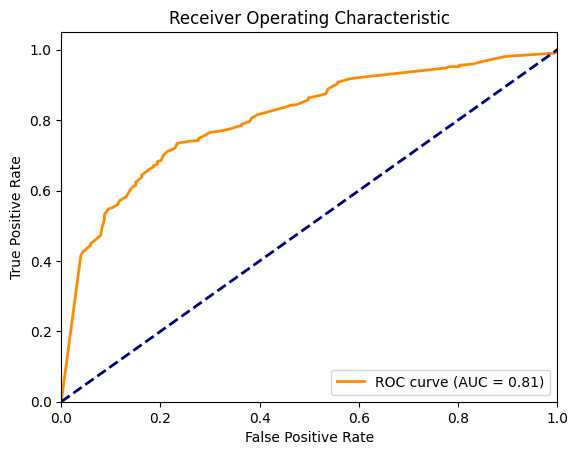

In [1414]:
# ROC Curve and AUC
y_pred_prob = best_model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test,y_pred_prob,multi_class='ovr',average='weighted')
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"Class {i} ROC-AUC:", roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [1415]:
# Auc = 0.80
# Recall = 0.76
# Precision = 0.75
# passed the stability test in k-fold cross validation.
# Hyperparameter tuned model resulted in a overfitted model scoring the same scores as that of G.B.M. Hence, we are rejecting the hyperparameter tuned results.
# The model is overfitted,failure to solve flop 

### Model Object

In [1416]:
from joblib import dump,load

In [1417]:
cols_to_drop = ['Classify', 'probability']
X_train_final = df_train.drop(columns=[c for c in cols_to_drop if c in df_train.columns])
y_train_final = df_train['Classify']

In [1418]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_final)

In [1419]:
model = RandomForestClassifier(criterion="gini",max_depth=5,min_samples_leaf=1,class_weight="balanced",random_state=42)
model.fit(X_train_scaled, y_train_final)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [1420]:
train_preds = model.predict(X_train_scaled)
print("Model Predictions distribution:", pd.Series(train_preds).value_counts())
print("Confusion Matrix:\n", confusion_matrix(y_train_final, train_preds))

Model Predictions distribution: 2    2313
1    1519
0     539
Name: count, dtype: int64
Confusion Matrix:
 [[ 122    2    0]
 [ 195  868  245]
 [ 222  649 2068]]


In [1421]:
dump(model, 'movie_success_model.joblib')

['movie_success_model.joblib']

In [1422]:
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [1423]:
model_columns = X_train_final.columns.tolist()
dump(model_columns, 'columns.joblib')

['columns.joblib']

In [1424]:
print("Model columns saved:")
print(model_columns)

Model columns saved:
['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes', 'gross_log', 'budget_log', 'num_voted_users_log', 'profit', 'total_cast_likes', 'review_ratio', 'country_Aruba', 'country_Australia', 'country_Bahamas', 'country_Belgium', 'country_Brazil', 'country_Bulgaria', 'country_Cambodia', 'country_Cameroon', 'country_Canada', 'country_Chile', 'country_China', 'country_Colombia', 'country_Czech Republic', 'country_Denmark', 'country_Dominican Republic', 'country_Egypt', 'country_Finland', 'country_France', 'country_Georgia', 'country_Germany', 'country_Greece', 'country_Hong Kong', 'country_Hungary', 'country_Iceland', 'country_India', 'country_Indonesia', 'country_Iran', 'country_Ireland', 'country_Israel', 'country_Italy', 'country_Japan', 'country_Kenya', 'country_Kyrgyzstan', 'co